In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import random
import h5py

In [2]:
filename = 'train_happy.h5'
f = h5py.File(filename , 'r')

In [3]:
for key in f.keys():
  print(key)

list_classes
train_set_x
train_set_y


In [4]:
happy_training = h5py.File('train_happy.h5','r')
happy_testing = h5py.File('test_happy.h5','r')

In [5]:
X_train= np.array(happy_training['train_set_x'][:])  #[:] import all items
y_train= np.array(happy_training['train_set_y'][:])
X_test= np.array(happy_testing['test_set_x'][:])
y_test= np.array(happy_testing['test_set_y'][:])

In [6]:
X_train.shape

(600, 64, 64, 3)

0


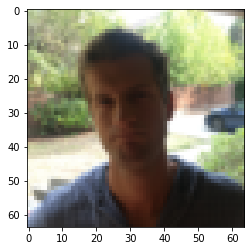

In [7]:
plt.imshow(X_train[10])  #[10] index of picture
print(y_train[10])

i=  183 0


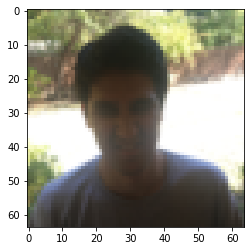

In [8]:
i=random.randint(1,600)
plt.imshow(X_train[i])  
print('i= ',i,y_train[i])

Now we printing a random group of matrix (25 x 25) pictures

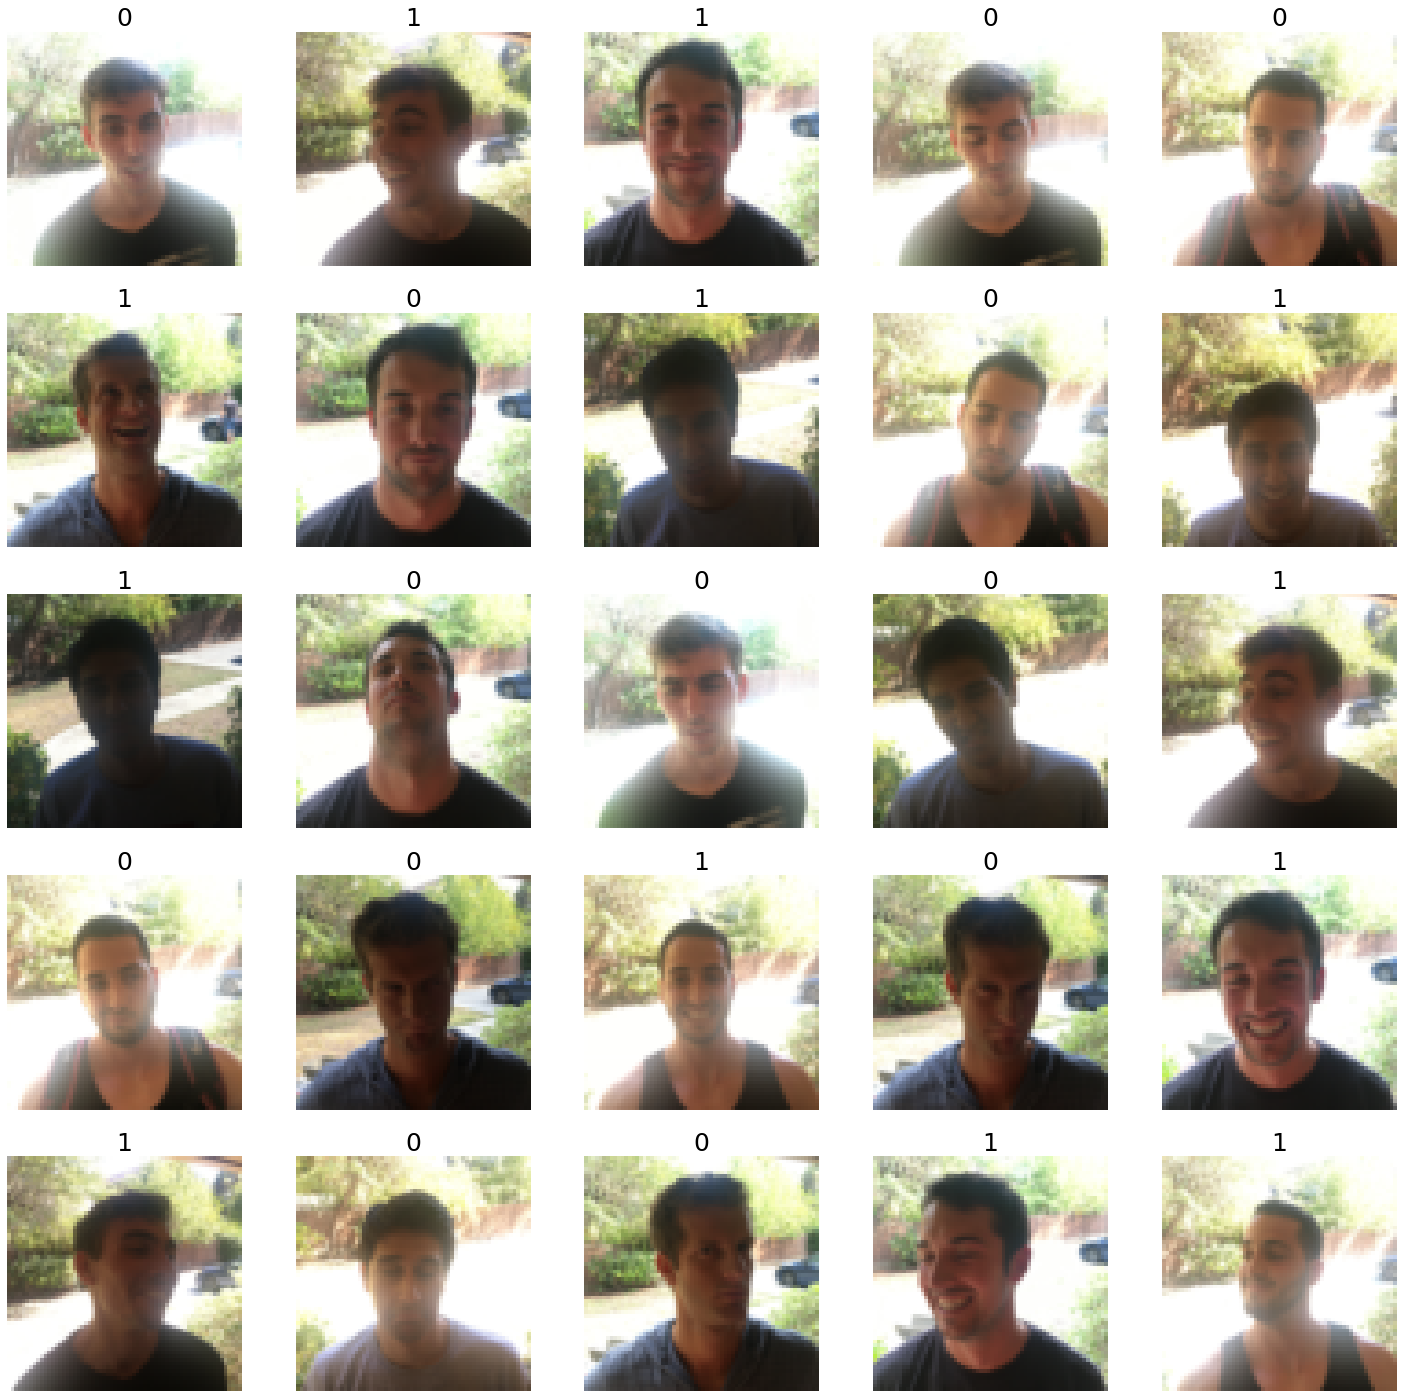

In [9]:
W_grid= 5 #width of grid(or matrix)
L_grid= 5 #length of grid(or matrix)

n_training=len(X_train) #no. of pictures

fig, axes = plt.subplots(L_grid,W_grid,figsize=(25,25)) #define the size of subplot
axes=axes.ravel()  #flattining the pictures
for i in np.arange(0,L_grid * W_grid): #we create a numbers (or a matrix) start from 0 to 25
    index = np.random.randint(0,n_training) #generate a random index from No. of pics
    axes[i].imshow(X_train[index]) #show the pic
    axes[i].set_title(y_train[index], fontsize=25)  #set the title that come from y_train(output)
    axes[i].axis('off')  #remove the dimensions of axis which is (64x64)

In [10]:
#normlization
X_train = X_train/255  
y_train = y_train/255

In [11]:
from keras.models import Sequential   # we build the net work as seq. i.e layer by layer 
from keras.layers import Conv2D ,MaxPooling2D, Dense, Flatten, Dropout 
#conv2d makes convlution (feature detection) , MaxPooling2D makes downsampling, we use Dense in fully connected network
from keras.optimizers import Adam 
from keras.callbacks import TensorBoard  #that means that we used tensorflow platform in backend

In [12]:
cnn_model = Sequential()

cnn_model.add(Conv2D(64,6,6, input_shape=(64,64,3), activation='relu'))  #64 filters of conv each one is 6x6
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Dropout(0.2))  #dropuot 20% of neurons

cnn_model.add(Conv2D(64,4,4,activation='relu'))  #we build a conv second layer with these parameters (the values of para are choosen randomly by try and error)
cnn_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
#cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=128, activation='relu'))  #we makes the fully connected layer the connect input with hidden layers
cnn_model.add(Dense(units=1, activation='sigmoid'))

In [13]:
cnn_model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy']) #we use 'binary_crossentropy' because we have just 2 probability , if we have more 2 we will use categoral_crossentropy
#matrics=['accuracy']   we are trying to improve accuracy

In [14]:

history= cnn_model.fit(X_train, y_train, batch_size = 30,  epochs=5, verbose = 1)  #take 30 pics in everytime of training

Epoch 1/5
20/20 [==============================] - 0s 9ms/step - loss: 0.1591 - accuracy: 0.4733
Epoch 2/5
20/20 [==============================] - 0s 9ms/step - loss: 0.0299 - accuracy: 0.5000
Epoch 3/5
20/20 [==============================] - 0s 8ms/step - loss: 0.0154 - accuracy: 0.5000
Epoch 4/5
20/20 [==============================] - 0s 9ms/step - loss: 0.0147 - accuracy: 0.5000
Epoch 5/5
20/20 [==============================] - 0s 8ms/step - loss: 0.0146 - accuracy: 0.5000


In [15]:
predicted_classess = cnn_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


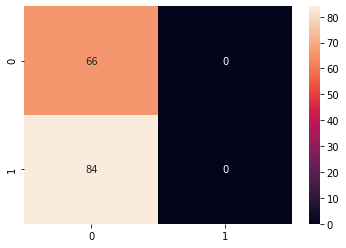

In [16]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,predicted_classess)
sns.heatmap(cm, annot=True)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_classess))

              precision    recall  f1-score   support

           0       0.44      1.00      0.61        66
           1       0.00      0.00      0.00        84

    accuracy                           0.44       150
   macro avg       0.22      0.50      0.31       150
weighted avg       0.19      0.44      0.27       150



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))

axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('prediction class = {}\n True Class = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 0.5)